##**BITS F464 - Semester 1 - MACHINE LEARNING**
--------------------------------------------------------------------------------

**PROJECT - MACHINE LEARNING FOR SUSTAINABLE DEVELOPMENT GOALS (SDGs)**
--------------------------------------------------------------------------------
***Team number:5***

---
Vanshika Sood,Yash Gupta,Hrithik Gupta,Ashna,J Chaitanya Sree Krishna

---
2021A8PS2910H,2021B4A72699H,2021A4PS2389H,2021A8PS3201H,2021A4PS2273H


# **_1. Preprocessing of Dataset_**

### The respective dataset has been shared in the project brief. Please refer to it.

In [ ]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
#importing data
df = pd.read_csv(r"/gdrive/MyDrive/proj_data_water/water_portability.csv")
#df = pd.read_csv(r"/gdrive/MyDrive/3-1/Ml/Project/P2 - Identification of Potable Water/water_portability.csv")

In [ ]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
df.shape

(3276, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [ ]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [ ]:
df.fillna(df.mean(),inplace=True) #fill mean instead of all NaN values, inplace is false by default
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


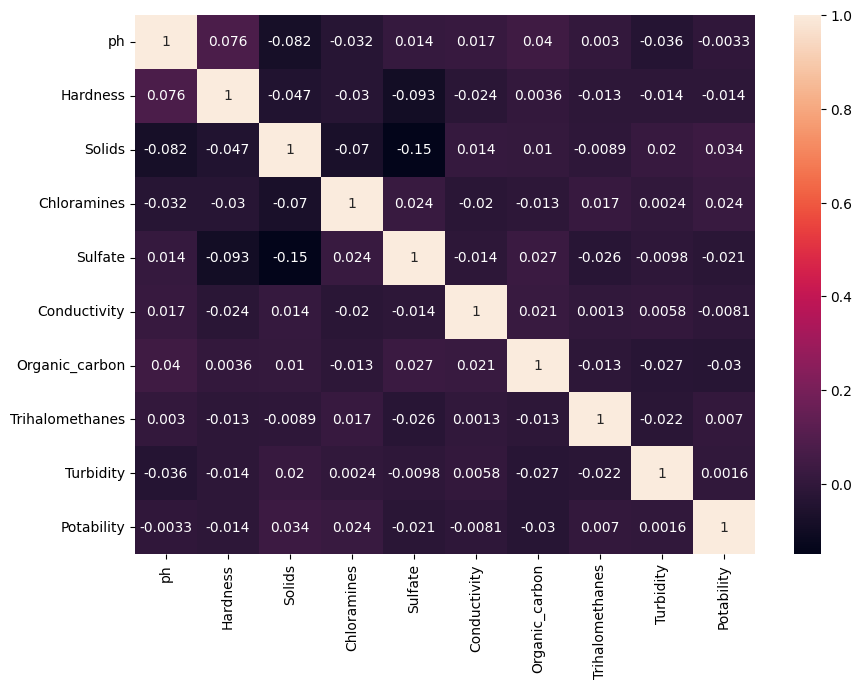

In [ ]:
sns.heatmap(df.corr(),annot=True) #checking correlation of data , since none of the variables correlate, we cannot reduce dimensions
fig=plt.gcf()
fig.set_size_inches(10,7)
plt.show()

In [ ]:
df['Potability'].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

Not generating new data as only slightly unbalanced count and large dataset in which NaN values were replaced by mean

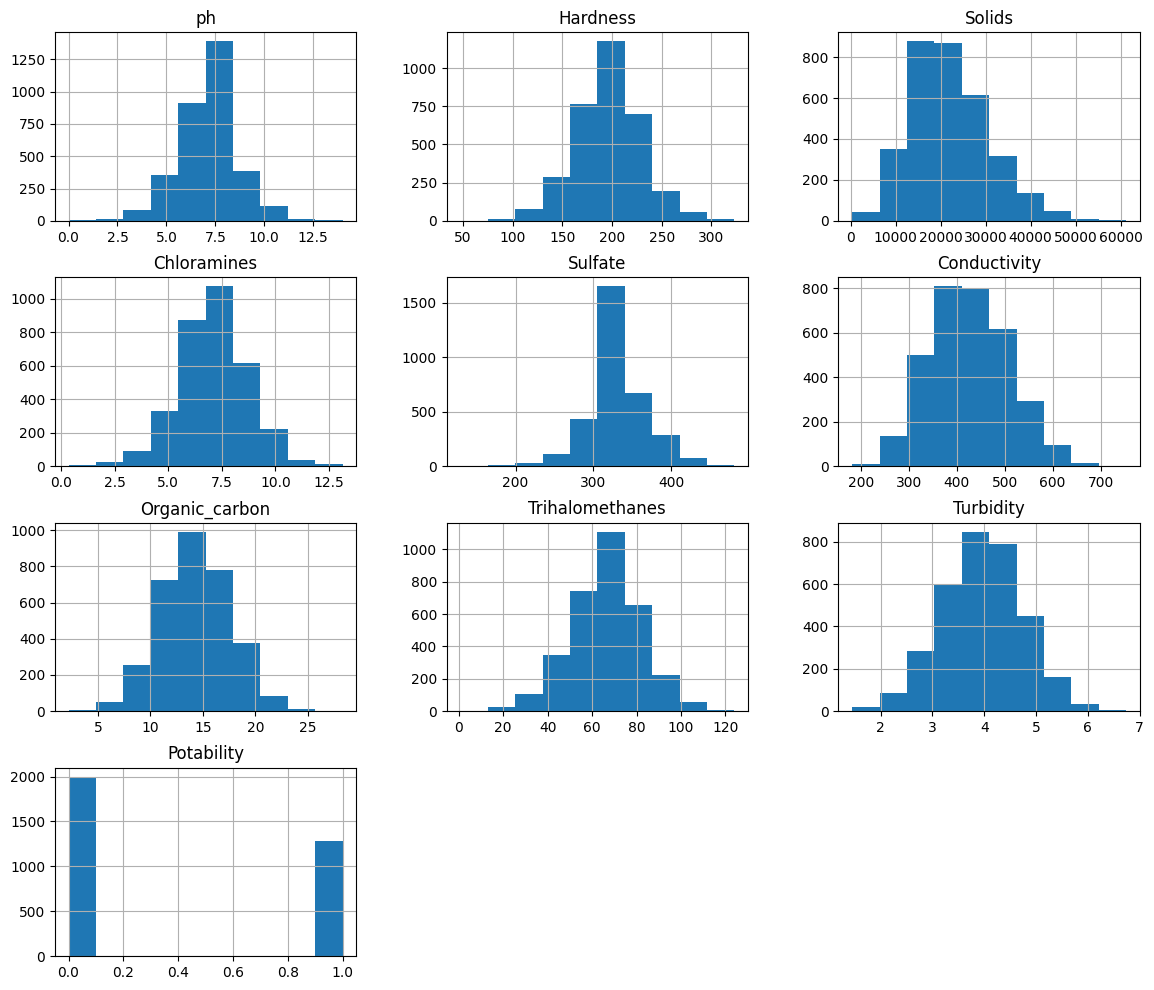

In [ ]:
df.hist(figsize=(14,12))  # shows data normally distributed
plt.show()

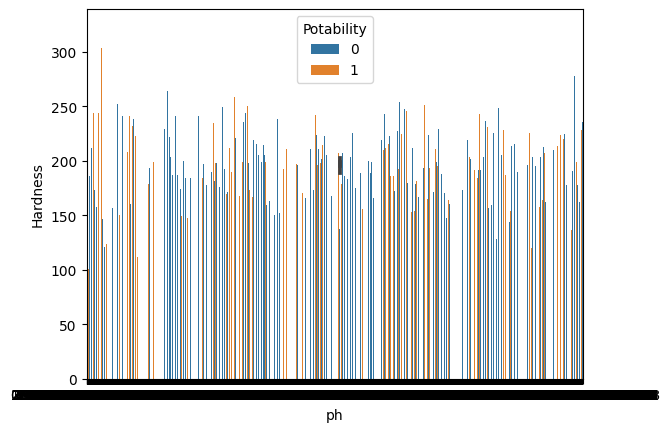

In [ ]:
sns.barplot(x=df['ph'],y=df['Hardness'],hue=df['Potability'])
plt.show()

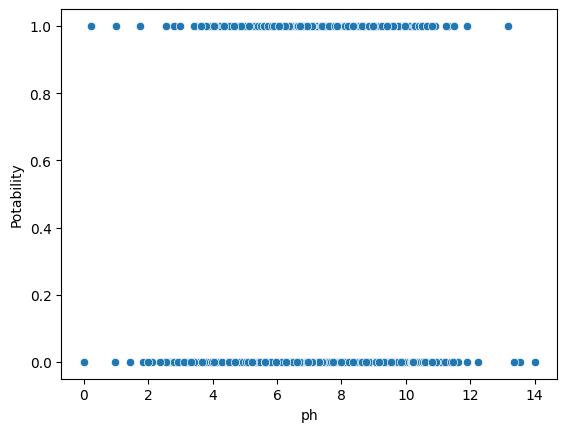

In [ ]:
sns.scatterplot(x=df['ph'],y=df['Potability'])
plt.show()

# **Partitioning**

In [ ]:
X=df.drop('Potability',axis=1)
X    # Input Variables

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075
...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821
3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243
3273,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658


In [ ]:
y=df['Potability']    # Target Variable
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Potability, dtype: int64

In [ ]:
# split into training and test set
# let training ratio = 0.67
trainingRatio = 0.67
noOfSamples = X.shape[0]
noOfTrainingSamples = int(trainingRatio * noOfSamples)

X_train, y_train = X[:noOfTrainingSamples], y[:noOfTrainingSamples]
X_test, y_test = X[noOfTrainingSamples:], y[noOfTrainingSamples:]

In [ ]:
X_test

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
2194,8.028304,204.783735,20408.485598,4.531581,406.328921,515.575097,21.558863,70.547218,3.915991
2195,7.080795,168.042465,18564.372055,8.562156,345.205222,419.131577,18.459890,59.700210,2.962433
2196,8.616824,228.762945,19126.298537,7.017578,327.894821,383.527023,14.759257,41.275927,4.584566
2197,9.467129,169.214408,33365.315416,8.460490,315.960398,449.723952,10.396796,74.326898,3.164188
2198,6.793699,227.225751,14470.053549,8.471509,274.444719,360.755674,19.402149,40.290591,4.822958
...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821
3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243
3273,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658


In [ ]:
type(X_test)
X_test.to_numpy()
X_train.to_numpy()
y_train.to_numpy()
y_test.to_numpy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
y_test.shape

(1082,)

# ***2. ML Model 1***

KNN


In [ ]:
import numpy as np

class KNNClassifier:
    def __init__(self,y_train, k=3):
        self.k = k
        self.y_train=y_train

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.Y_train = y_train

    def predict(self, X_test):
        predictions = []
        for sample in X_test.values:
            distances = np.linalg.norm(self.X_train.values - sample, axis=1)
            nearest_neighbors_indices = np.argsort(distances)[:self.k]
            nearest_labels = self.y_train.iloc[nearest_neighbors_indices]
            predicted_label = nearest_labels.mode().iloc[0]  # Majority voting
            predictions.append(predicted_label)
        return np.array(predictions)


knn_model = KNNClassifier(y_train,k=3)
knn_model.fit(X_train, y_train)

# Testing
predictions = knn_model.predict(X_test)

# Evaluate accuracy
accuracy = np.sum(predictions == y_test.values) / len(y_test)
print(f"Accuracy: {accuracy * 100:.2f}%")

knn_pred = predictions

Accuracy: 52.31%


In [ ]:
knn_true = y_test
(knn_pred.shape) == (knn_true.shape)

True

# ***3. ML Model 2***



### Naive Bayes

In [ ]:
import numpy as np

df = pd.read_csv(r"/gdrive/MyDrive/proj_data_water/water_portability.csv")
#df = pd.read_csv(r"/gdrive/MyDrive/3-1/Ml/Project/P2 - Identification of Potable Water/water_portability.csv")
df1 = df.sample(frac=1, random_state=42)
df1.dropna(how='any', inplace=True)

split_idx = int(0.67 * len(df1))
arr = df1.to_numpy()
X_train = arr[0:split_idx, 0:9]
y_train = arr[0:split_idx, 9]
X_test = arr[split_idx:, 0:9]
y_test = arr[split_idx:, 9]

class NaiveBayes:

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self._classes = np.unique(y)
        n_classes = len(self._classes)

        # calculating mean, var, and prior for each class
        self._mean = np.zeros((n_classes, n_features), dtype=np.float64)
        self._var = np.zeros((n_classes, n_features), dtype=np.float64)
        self._priors = np.zeros(n_classes, dtype=np.float64)

        for idx, c in enumerate(self._classes):
            X_c = X[y == c]
            self._mean[idx, :] = X_c.mean(axis=0)
            self._var[idx, :] = X_c.var(axis=0)
            self._priors[idx] = X_c.shape[0] / float(n_samples)


    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        posteriors = []

        # calculating posterior probability for each class
        for idx, c in enumerate(self._classes):
            prior = np.log(self._priors[idx])
            posterior = np.sum(np.log(self._pdf(idx, x)))
            posterior = posterior + prior
            posteriors.append(posterior)

        # returning class with the highest posterior
        return self._classes[np.argmax(posteriors)]

    def _pdf(self, class_idx, x):
        mean = self._mean[class_idx]
        var = self._var[class_idx]
        numerator = np.exp(-((x - mean) ** 2) / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator


def accuracy(y_true, y_pred):
      accuracy = np.sum(y_true == y_pred) / len(y_true)
      return accuracy


nb = NaiveBayes()
nb.fit(X_train, y_train)
predictions = nb.predict(X_test)

print(f"Naive Bayes classification accuracy {accuracy(y_test, predictions)* 100:.2f}%")

nb_pred = predictions

Naive Bayes classification accuracy 62.05%


In [ ]:
nb_true = y_test
(nb_true.shape) == (nb_pred.shape)

True

# ***4. ML Model 3***

In [ ]:
import numpy as np
import pandas as pd

def unit_step_func(x):  #defining unit step function
    return np.where(x > 0, 1, 0)

class Perceptron:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.activation_func = unit_step_func
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # initializing parameters
        self.weights = np.zeros(n_features)
        self.bias = 0
        y_ = np.where(y > 0, 1, 0)

        # learning weights
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_func(linear_output)

                # Perceptron update rule
                update = self.lr * (y_[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.activation_func(linear_output)
        return y_predicted

# Loading  dataset
# df = pd.read_csv(r"/gdrive/MyDrive/proj_data_water/water_portability.csv")
_datapm1_ = df.dropna()
_datanp_ = _datapm1_.to_numpy()



# columns 1 to 9 are the features, and column 10 is the label
X = _datanp_[:, 0:9]
y = _datanp_[:, 9]

# splitting the data
# 80% for training and 20% for testing
split_ratio = 0.8
split_index = int(len(X) * split_ratio)

X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Initializing and train the perceptron
perceptron_model = Perceptron(learning_rate=0.01, n_iters=1000)
perceptron_model.fit(X_train, y_train)

# predicted values on the test set
y_pred = perceptron_model.predict(X_test)

# Evaluating the accuracy of the model
accuracy = np.mean(y_pred == y_test)
print(f"Accuracy: {accuracy * 100:.2f}%")

perceptron_pred = y_pred

Accuracy: 49.88%


In [ ]:
perceptron_true = y_test
(perceptron_true.shape) == (perceptron_pred.shape)

True

# ***5. ML Model 4 (Based on research literature)***

Bayesian Belief Network

In [ ]:
import numpy as np
import pandas as pd

df1 = df.sample(frac=1, random_state=42)
df1.dropna(how='any', inplace=True)


split_idx = int(0.67 * len(df1))
arr = df1.to_numpy()


class BayesianNetwork:
    def __init__(self, structure, values):
        self.structure = structure
        self.values = values

    def fit(self, X, y):
        self.class_probabilities = self.calculate_class_probabilities(y)
        self.feature_probabilities = self.calculate_feature_probabilities(X, y)

        '''debugging:
        print("inside fit, class prob = \n", self.class_probabilities)
        print("inside fit, feature prob = \n", self.feature_probabilities)'''

    def predict(self, x):
        class_probabilities = {c: 1 / len(self.values[self.structure[-1]]) for c in self.values[self.structure[-1]]}

        '''debugging:
        print("inside predict1, class prob: \n", class_probabilities)'''

        for i, feature_value in enumerate(x):
            feature_node = self.structure[i]
            for class_value in self.values[self.structure[-1]]:
                class_probabilities[class_value] *= self.feature_probabilities[feature_node][feature_value][class_value]
                # debugging
                # print("feature node:", feature_node, "feature value:", feature_value, "class value:", class_value, "class prob:", class_probabilities[class_value])

        # debugging
        # print("inside predict2, class prob: \n", class_probabilities)
        total_probability = sum(class_probabilities.values())
        normalized_probabilities = {k: v / total_probability for k, v in class_probabilities.items()}
        return normalized_probabilities


    def calculate_class_probabilities(self, y):
        class_probabilities = {c: sum(y == c) / len(y) for c in self.values[self.structure[-1]]}
        return class_probabilities

    def calculate_feature_probabilities(self, X, y):
      epsilon = 1e-10  # to avoid division by zero
      feature_probabilities = {}
      for feature_node in self.structure[:-1]:
        feature_probabilities[feature_node] = {}
        for feature_value in self.values[feature_node]:
            feature_probabilities[feature_node][feature_value] = {}
            for class_value in self.values[self.structure[-1]]:
                numerator = sum((X[:, self.structure.index(feature_node)] == feature_value) & (y == class_value))
                denominator = sum(y == class_value)
                feature_probabilities[feature_node][feature_value][class_value] = (numerator+epsilon) / (denominator+epsilon)
      return feature_probabilities

structure = list(df1.columns)
values = {col: df1[col].unique() for col in structure}

bayesian_network = BayesianNetwork(structure, values)

# Fitting the model to the training data
bayesian_network.fit(X_train, y_train)

predictions = [bayesian_network.predict(instance) for instance in X_test]
# debugging
# print(predictions)

predictions = np.array(predictions)

# debugging
# print(predictions)

# replacing NaNs with zeros
predictions = np.nan_to_num(predictions)

# debugging
# print(predictions)

# class label with the highest probability for each instance
predicted_labels = np.array([max(prediction, key=prediction.get) for prediction in predictions])

accuracy = np.mean(predicted_labels == y_test)
print("Accuracy is:", accuracy*100 , "%")

bbn_pred = predicted_labels

Accuracy is: 50.12406947890818 %


In [ ]:
bbn_true = y_test
(bbn_true.shape) == (bbn_pred.shape)

True

# ***6. Comparison of insights drawn from the models***

In this section, we will compare the effectiveness of the classification models used above. Metrics like ***Accuracy, Precision, Recall and F1 Score*** are used and finally the ***Confusion matrices*** provide detailed breakdowns of the performance of the various models used in this project.

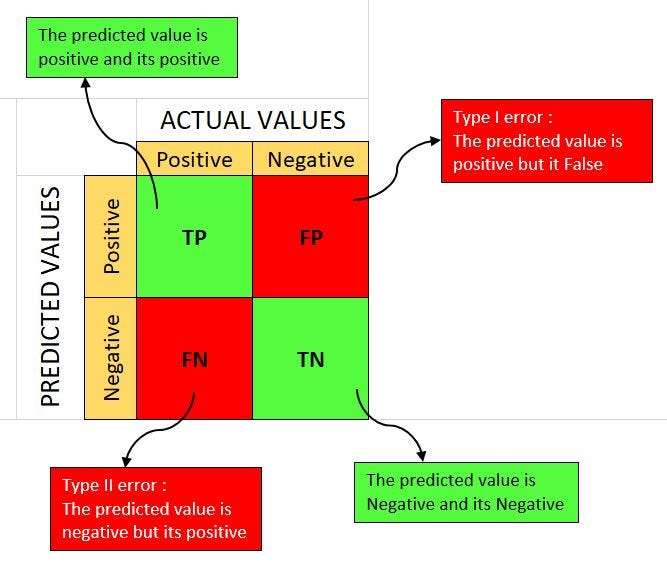

source: https://medium.com/analytics-vidhya/what-is-a-confusion-matrix-d1c0f8feda5

In [ ]:
def metrics(y_true, y_pred):
  tp = np.sum((y_pred == 1) & (y_true == 1))
  fp = np.sum((y_pred == 1) & (y_true == 0))
  fn = np.sum((y_pred == 0) & (y_true == 1))
  tn = np.sum((y_pred == 0) & (y_true == 0))


  accuracy = np.mean(y_pred == y_true)
  precision = tp / (tp + fp + 1e-8)  # to avoid division by zero
  recall = tp / (tp + fn + 1e-8)
  f1_score = 2 * (precision * recall) / (precision + recall + 1e-8)

  ''' Printing a simple confusion matrix without using sklearn-

    confusion matrix:

                  tp  fp
                  fn  tn

    '''
  cm = [[tp,fp],[fn, tp]]

  return (accuracy, precision, recall, f1_score, cm)

In [ ]:
# calculating metrics for each model

# model 1 - knn
knn_accuracy, knn_precision, knn_recall, knn_f1score, knn_cm = metrics(knn_true, knn_pred)
print(f"For K-nearest neighbours algorithm, \n\tthe accuracy is {knn_accuracy * 100:.2f}% \n\tthe precision is {knn_precision} \n\tthe recall is {knn_recall} \n\tthe F1 Score is {knn_f1score} \n\tand the confusion matrix is: \n\t\t{knn_cm}")

# # model 2 - naive bayes
nb_accuracy, nb_precision, nb_recall, nb_f1score, nb_cm = metrics(nb_true, nb_pred)
print(f"For Naive Bayes Classifier, \n\tthe accuracy is {nb_accuracy * 100:.2f}% \n\tthe precision is {nb_precision} \n\tthe recall is {nb_recall} \n\tthe F1 Score is {nb_f1score} \n\tand the confusion matrix is: \n\t\t{nb_cm}")

# model 3 - perceptron
perceptron_accuracy, perceptron_precision, perceptron_recall, perceptron_f1score, perceptron_cm = metrics(perceptron_true, perceptron_pred)
print(f"For Perceptron, \n\tthe accuracy is {perceptron_accuracy * 100:.2f}% \n\tthe precision is {perceptron_precision} \n\tthe recall is {perceptron_recall} \n\tthe F1 Score is {perceptron_f1score} \n\tand the confusion matrix is: \n\t\t{perceptron_cm}")

# model 4 - bbn (bayesian belief network)
bbn_accuracy, bbn_precision, bbn_recall, bbn_f1score, bbn_cm = metrics(bbn_true, bbn_pred)
print(f"For Bayesian Belief Network, \n\tthe accuracy is {bbn_accuracy * 100:.2f}% \n\tthe precision is {bbn_precision} \n\tthe recall is {bbn_recall} \n\tthe F1 Score is {bbn_f1score} \n\tand the confusion matrix is: \n\t\t{bbn_cm}")


F1_scores = {knn_f1score : "K-nearest neighbours algorithm", nb_f1score : "Naive Bayes Classifier", perceptron_f1score : "Perceptron", bbn_f1score : "Bayesian Belief Network"}
max_f1 = F1_scores.get(max(F1_scores))
print(f"\nThus, {max_f1} has the highest F1 Score.")


For K-nearest neighbours algorithm, 
	the accuracy is 52.31% 
	the precision is 0.4398734177075989 
	the recall is 0.29079497907341434 
	the F1 Score is 0.35012593978370526 
	and the confusion matrix is: 
		[[139, 177], [339, 139]]
For Naive Bayes Classifier, 
	the accuracy is 62.05% 
	the precision is 0.5801526717114387 
	the recall is 0.278388278378081 
	the F1 Score is 0.37623761936145966 
	and the confusion matrix is: 
		[[76, 55], [197, 76]]
For Perceptron, 
	the accuracy is 49.88% 
	the precision is 0.49999999875 
	the recall is 0.009900990098519753 
	the F1 Score is 0.019417475345461406 
	and the confusion matrix is: 
		[[2, 2], [200, 2]]
For Bayesian Belief Network, 
	the accuracy is 50.12% 
	the precision is 0.5012406947766441 
	the recall is 0.999999999950495 
	the F1 Score is 0.6677685905711359 
	and the confusion matrix is: 
		[[202, 201], [0, 202]]

Thus, Bayesian Belief Network has the highest F1 Score.


Since misclassification of non-potable water as potable is more harmful, i.e. there is a high cost associated with false positives, precision, besides accuracy, is a good model metric and Naive Bayes has the best precision as well as accuracy among the above models.

# **_7. References_**

1.   https://colab.research.google.com/corgiredirector?site=https%3A%2F%2Fmedium.com%2Fanalytics-vidhya%2Fwhat-is-a-confusion-matrix-d1c0f8feda5
2.   https://koopingshung.com/blog/machine-learning-model-selection-accuracy-precision-recall-f1/amp/
3.   https://www.sciencedirect.com/science/article/pii/S0377221714005360
4.   Christopher M. Bishop- Pattern Recognition and Machine Learning
5.   https://towardsdatascience.com/bbn-bayesian-belief-networks-how-to-build-them-effectively-in-python-6b7f93435bba





